# Experiment 7-8

## Anirudh Roy
## 19BCS6136

Problem Statement:  Apply LeNet for recognizing MNIST handwritten digit images.





### 1. Loading the MNIST dataset

In [1]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print('X_train shape', X_train.shape, 'X_test shape', X_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
X_train shape (60000, 28, 28) X_test shape (10000, 28, 28)


In [2]:
print('X_train shape', X_train.shape, 'X_test shape', X_test.shape)

X_train shape (60000, 28, 28) X_test shape (10000, 28, 28)


In [3]:
type(X_train)

numpy.ndarray

Visualizing randomly some images in the training set:



In [4]:
import matplotlib.pyplot as plt 
import random 

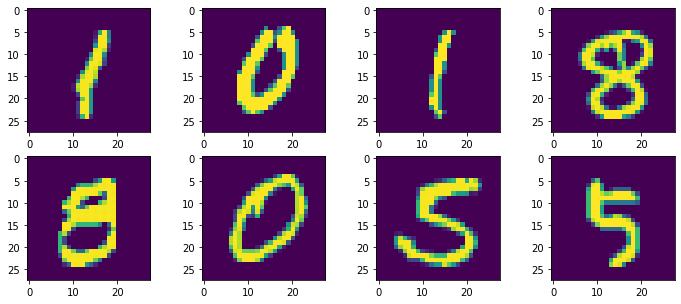

In [5]:
plt.figure(figsize = (12,5))
for i in range(8):
  ind = random.randint(0, len(X_train))
  plt.subplot(240+1+i)
  plt.imshow(X_train[ind])

### 2. Preprocessing data
This task includes the following steps:

*   Reshape images into required size of Keras
*   Convert integer values into float values
*   Normalize data
*   One-hot encodeing labels

In [6]:
import tensorflow
from tensorflow.keras.utils import to_categorical

In [7]:
def preprocess_data(X_train, y_train, X_test, y_test):
  # reshape images to the the required size by Keras
  X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
  X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
  # convert from integers to floats
  X_train = X_train.astype('float32')
  X_test = X_test.astype('float32')
  # normalize to range 0-1
  X_train = X_train/255.0
  X_test_norm = X_test/255.0
  # One-hot encoding label 
  y_train = to_categorical(y_train)
  y_test = to_categorical(y_test)
  return X_train, y_train, X_test, y_test 

### 3. Buiding the LeNet model

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
# metrics 
from tensorflow.keras.metrics import categorical_crossentropy
# optimization method
from tensorflow.keras.optimizers import SGD

In [9]:
def LeNet():
  model = Sequential()
  model.add(Conv2D(filters = 6, kernel_size = (5,5), padding = 'same', activation = 'relu', input_shape = (28,28,1)))
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Conv2D(filters = 16, kernel_size = (5,5), activation = 'relu'))
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Flatten())
  model.add(Dense(120, activation = 'relu'))
  model.add(Dense(10, activation = 'softmax'))
  # compile the model with a loss function, a metric and an optimizer function
  opt = SGD(lr = 0.01)
  model.compile(loss = categorical_crossentropy, 
                optimizer = opt, 
                metrics = ['accuracy']) 
  return model

In [10]:
LeNet_model = LeNet()
LeNet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


### 4. Training the model
Define the training function

In [11]:
def train_model(model, X_train, y_train, X_test, y_test, epochs = 50, batch_size = 128):
  # Rescaling all training and testing data
  X_train, y_train, X_test, y_test = preprocess_data(X_train, y_train, X_test, y_test)
  # Fitting the model
  history = model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, steps_per_epoch = X_train.shape[0]//batch_size, validation_data = (X_test, y_test), validation_steps = X_test.shape[0]//batch_size, verbose = 1)
  # evaluate the model
  _, acc = model.evaluate(X_test, y_test, verbose = 1)
  print('%.3f' % (acc * 100.0))
  summary_history(history)

In [12]:
def summary_history(history):
  plt.figure(figsize = (10,6))
  plt.plot(history.history['accuracy'], color = 'blue', label = 'train')
  plt.plot(history.history['val_accuracy'], color = 'red', label = 'val')
  plt.legend()
  plt.title('Accuracy')
  plt.show()

Epoch 1/50
468/468 [==============================] - 33s 69ms/step - loss: 1.1227 - accuracy: 0.6872 - val_loss: 35.7792 - val_accuracy: 0.9097
Epoch 2/50
468/468 [==============================] - 32s 69ms/step - loss: 0.2907 - accuracy: 0.9140 - val_loss: 28.8609 - val_accuracy: 0.9355
Epoch 3/50
468/468 [==============================] - 32s 69ms/step - loss: 0.2201 - accuracy: 0.9345 - val_loss: 23.4855 - val_accuracy: 0.9464
Epoch 4/50
468/468 [==============================] - 32s 69ms/step - loss: 0.1799 - accuracy: 0.9459 - val_loss: 21.2490 - val_accuracy: 0.9549
Epoch 5/50
468/468 [==============================] - 32s 69ms/step - loss: 0.1522 - accuracy: 0.9547 - val_loss: 17.5459 - val_accuracy: 0.9611
Epoch 6/50
468/468 [==============================] - 32s 69ms/step - loss: 0.1322 - accuracy: 0.9612 - val_loss: 15.0528 - val_accuracy: 0.9655
Epoch 7/50
468/468 [==============================] - 32s 69ms/step - loss: 0.1180 - accuracy: 0.9649 - val_loss: 13.9233 - val_ac

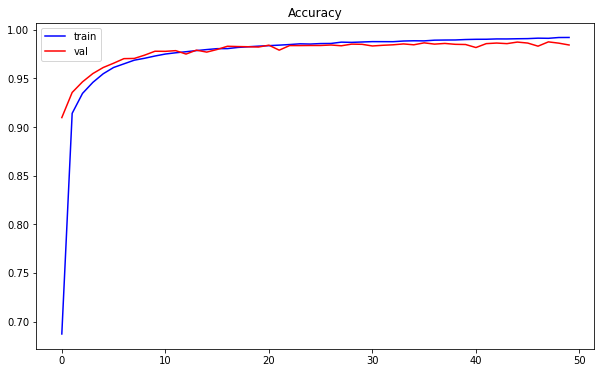

In [13]:
train_model(LeNet_model, X_train, y_train, X_test, y_test)

### 5. Prediction


In [14]:
import numpy as np

In [15]:
# predict labels for the test set
y_test_pred = []
for i in range(len(X_test)):
  img = X_test[i]
  img = img.reshape(1,28,28,1)
  img = img.astype('float32')
  img = img/255.0
  # one-hot vector output
  vec_p = LeNet_model.predict(img)
  # determine the lable corresponding to vec_p
  y_p = np.argmax(vec_p)
  y_test_pred.append(y_p)

In [16]:
# convert y_test_pred from list to array
y_test_pred = np.asarray(y_test_pred)

Determine the confusion matrix



In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 

Text(51.0, 0.5, 'True classes')

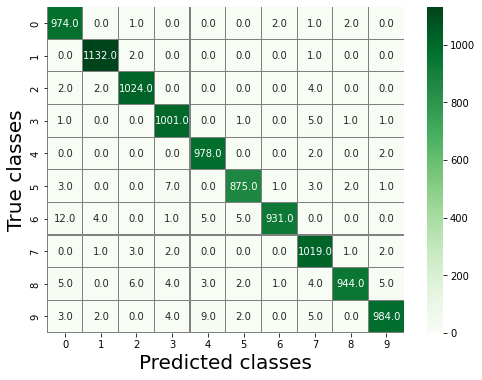

In [18]:
con_mat = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize = (8,6))
sns.heatmap(con_mat, linewidths = 0.1, cmap = 'Greens', linecolor = 'gray', fmt = '.1f', annot = True)
plt.xlabel('Predicted classes', fontsize = 20)
plt.ylabel('True classes', fontsize = 20)

Visualize randomly some images in the test set as well as their predicted labels



In [19]:
# all categories
cates = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

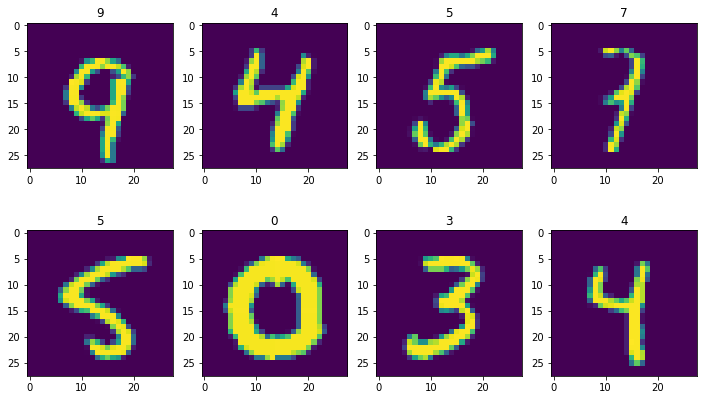

In [20]:
plt.figure(figsize = (12,7))
for i in np.arange(8):
  ind = random.randint(0,len(X_test))
  img = X_test[ind]
  img = img.reshape(1,28,28,1)
  img = img.astype('float32')
  img = img/255.0
  v_p = LeNet_model.predict(img)
  v_p = np.round(v_p).astype(int)
  plt.subplot(240+1+i)
  plt.imshow(X_test[ind])
  plt.title(cates[np.argmax(v_p[0])])